In [28]:
%config IPCompleter.greedy=True
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Logistic Regression

### Binary classification examples

A training example consists of input vector $x$ and output boolean $y$:  
$(\boldsymbol{x}, y) \mid \boldsymbol{x} \in \mathbb{R}^{n_x}, y \in \lbrace 0, 1 \rbrace$  

$m$ training examples:  
$
\left\lbrace
\left(\boldsymbol{x}^{(1)}, y^{(1)}\right), 
\left(\boldsymbol{x}^{(2)}, y^{(2)}\right),
\dots,
\left(\boldsymbol{x}^{(m)}, y^{(m)}\right)
\right\rbrace
$  

So the full training set $\boldsymbol{X}$ consists of $m$ vectors that are $n$ long giving a $(n×m)$ shaped matrix:  
$
\boldsymbol{X} =
\begin{vmatrix}
\mid & \mid & \mid & \mid \\
\boldsymbol{x}^{(1)} &  \boldsymbol{x}^{(2)} & \dots & \boldsymbol{x}^{(m)} \\
\mid & \mid & \mid & \mid
\end{vmatrix}
$  

The corresponding $y$ solutions form the following $(1×m)$ matrix:  
$
\boldsymbol{Y} =
\left[
y^{(1)}, y^{(2)}, \dots, y^{(m)}
\right]
$ 


### Logistic Regression - A Single-Neuron System
for solving Binary Classification

Looking for: $\hat{y} = P(y=1 \mid \boldsymbol{x})$  
Note: $0 \le \hat{y} \le 1$

Logistic Regression parameters: weights and bias: $\boldsymbol{w} \in \mathbb{R}^{n_x}, b \in \mathbb{R}$  
Logistic Regression output: $$\hat{y} = \sigma(\boldsymbol{w}^{\intercal}\boldsymbol{x} + b)$$

Where: sigmoid fn: $\sigma(z) = \frac{1}{1+e^{-z}}$

### Cross-Entropy Loss Function ("Log Loss")

MSE (Mean Squared Error) $L2 = \frac{1}{2}(\hat{y}-y)^2$ is not good because for Logistic Regression it tends to have many local minima.  

Instead we use **Cross-Entropy Loss** which will have one global minimum: $$L(\hat{y}, y) = -(y\log\hat{y} + (1-y)\log(1-\hat{y}))$$  
Intuition: since $y \in \lbrace0,1\rbrace$:  
- if $y=1: L(\hat{y}, y) = -\log\hat{y}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
As $\hat{y}$ gets further from true 1, $L$ gets exponentially bigger.
- if $y=0: L(\hat{y}, y) = -\log(1-\hat{y})$ &nbsp;&nbsp;&nbsp;
As $\hat{y}$ gets further from true 0, $L$ gets exponentially bigger.  

Why is it called *Cross-Entropy*?  

**Entropy** is average amount of information contained in an element of a distribution.  
Information can be regarded as deviance from ground zero. It can be measured by comparing a distribution (i.e. the prediction) to an actual fixed outcome. We want to measure how many times uncertainity was halved when replacing the predicted distribution with the actual outcome. This is the number of *bits* of information.  
E.g. take a predicted discrete distribution $\hat{p}$ size 2: $\hat{p}_0 = 0.75$ and $\hat{p}_1 = 0.25$. Let's say the fixed outcome is $p_0=0$ and $p_1=1$. The uncertainity for case $\hat{p}_1$ has decreased four-fold, which is 2 bits of information. This can also be calculated as $InfoBits = -\log_2\hat{p}_1$. Applying the same calculation to $\hat{p}_0$ yields 0.415 bits. Taking the weighted average of the two bit counts is the entropy of the distribution: $0.75*0.415+0.25*2 = 0.811$ bits.  
**Entropy function:**
$$H(\hat{p}) = -\sum_i(\hat{p}_i\log_2\hat{p}_i)$$
**Cross-Entropy**, however, is the amount of information gained by learning a particular truth in relation to a predicted distribution. It depends on both the predicted distribution $\hat{p}$ and the learned truth-distribution $p$.
$$H(p,\hat{p}) = -\sum_i(p_i\log_2\hat{p}_i)$$

In [90]:
# Simple Cross-Entropy (for Bernoulli distribution only)
def cross_entropy_bernoulli(y, yhat, eps=1e-15):
    if(yhat==0):
        yhat += eps
    if(yhat==1):
        yhat -= eps
    return -( y*math.log2(yhat) + (1-y)*math.log2(1-yhat) )

# Vectorized Cross-Entropy
# Returns: -( y*math.log2(yhat) + (1-y)*math.log2(1-yhat) )
def v_cross_entropy_bernoulli(ys, yhats, eps=1e-15):
    yhats[yhats==0] += eps
    yhats[yhats==1] -= eps
    resultYes = ys * np.log2(yhats)
    resultNo = (1-ys) * np.log2(1-yhats)
    return - (resultYes + resultNo)    

# Pseudo-Vectorized Cross-Entropy
pseudo_v_cross_entropy_bernoulli = np.vectorize(cross_entropy_bernoulli, otypes=[np.float], cache=False)

CPU times: user 10.7 ms, sys: 81 µs, total: 10.8 ms
Wall time: 10.8 ms
CPU times: user 4.75 ms, sys: 9.43 ms, total: 14.2 ms
Wall time: 14.2 ms
CPU times: user 344 ms, sys: 11.4 ms, total: 355 ms
Wall time: 356 ms
CPU times: user 375 ms, sys: 0 ns, total: 375 ms
Wall time: 375 ms
CPU times: user 947 ms, sys: 21.3 ms, total: 968 ms
Wall time: 968 ms
CPU times: user 984 ms, sys: 39.3 ms, total: 1.02 s
Wall time: 1.02 s


<function matplotlib.pyplot.show>

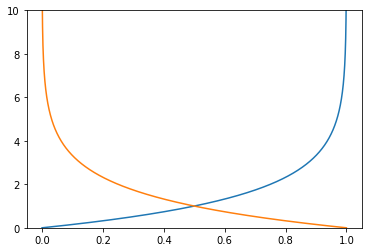

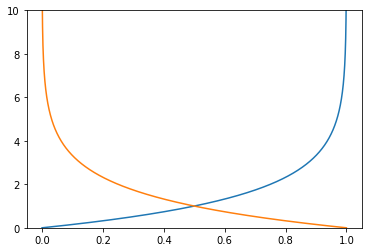

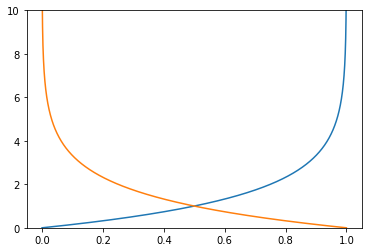

In [91]:
n = 100000
ys0 = np.zeros(n)
ys1 = np.ones(n)
yhats = np.linspace(1e-15,1-1e-15,n)

# Vectorized
%time losses0 = v_cross_entropy_bernoulli(ys0, yhats)
%time losses1 = v_cross_entropy_bernoulli(ys1, yhats)
plt.figure(1)
plt.ylim(0, 10)
plt.plot(yhats, losses0)
plt.plot(yhats, losses1)
plt.show

# Pseudo-vectorized
%time losses0 = pseudo_v_cross_entropy_bernoulli(ys0, yhats)
%time losses1 = pseudo_v_cross_entropy_bernoulli(ys1, yhats)
plt.figure(2)
plt.ylim(0, 10)
plt.plot(yhats, losses0)
plt.plot(yhats, losses1)
plt.show

# Loop
%time losses0 = np.array([cross_entropy_bernoulli(ys0[i], yhats[i]) for i in range(ys0.shape[0])])
%time losses1 = np.array([cross_entropy_bernoulli(ys1[i], yhats[i]) for i in range(ys1.shape[0])])
plt.figure(3)
plt.ylim(0, 10)
plt.plot(yhats, losses0)
plt.plot(yhats, losses1)
plt.show

In [57]:
tomb = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(tomb)
print(tomb[tomb<=6])
print(tomb[tomb>6])


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[1 2 3 4 5 6]
[ 7  8  9 10 11 12]
